In [25]:
import numpy as np
import scipy.misc
import imageio
from scipy.fftpack import dct, idct
import sys
from PIL import Image
import matplotlib.pyplot as plt

In [26]:
H = 128
W = 128

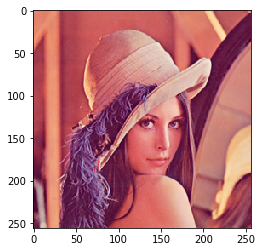

In [27]:
# pillow(PIL)で画像を読み込むようにする
bmp = Image.open("Lenna.bmp")
plt.imshow(bmp)

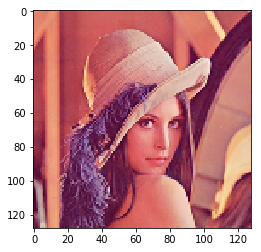

In [28]:
# リサイズする
lenna = np.array(bmp.resize((H, W)))
plt.imshow(lenna)

In [47]:
# 2次元でのDCTを実行
lenna_F = dct(dct(lenna, axis = 0, norm='ortho'), axis = 1, norm='ortho')

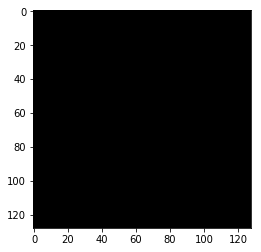

In [30]:
# 0で初期化したnumpy配列を作成
canvas = np.zeros((H , *(W, 3)))
# canvas
plt.imshow(canvas)

In [34]:
bases = []
images = []
for h in range(H):
    for w in range(W):
        a = np.zeros((H, W))
        a[h, w] = 1
        base = idct(idct(a, axis=0), axis=1)
        canvas[:,:,0] += lenna_F[h, w, 0] * base
        canvas[:,:,1] += lenna_F[h, w, 1] * base
        canvas[:,:,2] += lenna_F[h, w, 2] * base

In [10]:
def min_max(x, axis=None):
    min = x.min(axis=axis, keepdims=True)
    max = x.max(axis=axis, keepdims=True)
    result = (x-min)/(max-min)
    return result

result = np.zeros((H , *(W, 3)))
result[:,:,0] = min_max(canvas[:,:,0])
result[:,:,1] = min_max(canvas[:,:,1])
result[:,:,2] = min_max(canvas[:,:,2])
plt.imsave("canvas.png", result)

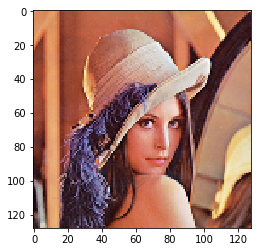

In [32]:
lenna_canvas = Image.open("canvas.png")
plt.imshow(lenna_canvas)

In [17]:
lenna

array([[[223, 137, 133],
        [228, 138, 123],
        [228, 135, 126],
        ...,
        [185,  91, 102],
        [229, 144, 129],
        [221, 130, 110]],

       [[225, 141, 116],
        [228, 131, 112],
        [226, 134, 116],
        ...,
        [197,  99,  98],
        [186,  91,  93],
        [118,  35,  71]],

       [[222, 132, 103],
        [226, 124, 107],
        [225, 130, 110],
        ...,
        [156,  59,  73],
        [ 91,  19,  62],
        [ 91,  27,  67]],

       ...,

       [[ 97,  34,  66],
        [ 93,  24,  61],
        [103,  37,  75],
        ...,
        [103,  30,  58],
        [102,  28,  60],
        [132,  42,  55]],

       [[ 97,  35,  64],
        [ 96,  28,  63],
        [ 97,  29,  67],
        ...,
        [107,  35,  63],
        [132,  47,  70],
        [161,  55,  69]],

       [[ 96,  32,  62],
        [ 92,  26,  62],
        [ 89,  21,  58],
        ...,
        [120,  53,  79],
        [162,  68,  80],
        [181,  71,  81]]

In [35]:
canvas_uint8 = canvas.astype(np.uint8)

In [39]:
canvas

array([[[43843583.99999967, 26935295.9999997 , 26148863.99999999],
        [44826624.00000056, 27131903.99999977, 24182784.00000014],
        [44826624.00000051, 26542080.00000035, 24772607.9999999 ],
        ...,
        [36372479.99999963, 17891328.00000002, 20054016.00000004],
        [45023231.99999981, 28311551.9999998 , 25362432.00000017],
        [43450368.00000001, 25559039.99999988, 21626880.00000015]],

       [[44236799.99999992, 27721727.99999971, 22806528.00000019],
        [44826623.99999987, 25755648.0000001 , 22020095.99999979],
        [44433408.00000017, 26345472.00000046, 22806528.00000007],
        ...,
        [38731776.00000014, 19464192.00000006, 19267584.00000001],
        [36569088.00000039, 17891328.00000016, 18284544.00000024],
        [23199744.00000029,  6881279.99999993, 13959167.99999988]],

       [[43646976.0000005 , 25952256.00000006, 20250623.99999976],
        [44433408.00000023, 24379391.99999991, 21037055.99999989],
        [44236800.00000013, 2555

In [40]:
canvas.dtype

dtype('float64')

In [36]:
canvas_uint8

array([[[255, 255, 255],
        [  0, 255,   0],
        [  0,   0, 255],
        ...,
        [255,   0,   0],
        [255, 255,   0],
        [  0, 255,   0]],

       [[255, 255,   0],
        [255,   0, 255],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0, 255, 255]],

       [[  0,   0, 255],
        [  0, 255, 255],
        [  0, 255,   0],
        ...,
        [255,   0, 255],
        [255, 255,   0],
        [  0, 255, 255]],

       ...,

       [[  0, 255,   0],
        [  0,   0,   0],
        [  0, 255, 255],
        ...,
        [255, 255,   0],
        [  0,   0, 255],
        [255,   0, 255]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [255,   0,   0],
        ...,
        [255, 255,   0],
        [  0,   0, 255],
        [255,   0,   0]],

       [[255, 255,   0],
        [255, 255, 255],
        [255,   0, 255],
        ...,
        [255, 255, 255],
        [  0, 255,   0],
        [  0, 255, 255]]

In [37]:
plt.imsave("canvas_uint8.png",canvas_uint8)

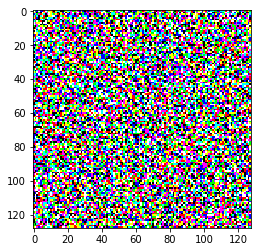

In [38]:
lenna_canvas_unit8 = Image.open("canvas_uint8.png")
plt.imshow(lenna_canvas_unit8)

In [50]:
lenna_F.dtype

dtype('float64')

In [51]:
lenna_F

array([[[ 2.30074766e+04,  1.26216406e+04,  1.34361875e+04],
        [-7.56824173e+02, -1.64113503e+03, -9.65875500e+02],
        [-3.22697816e+02, -2.42305545e+02, -6.21764078e+02],
        ...,
        [-1.38155415e+01, -8.05541281e+00, -2.14112543e-01],
        [-1.68168535e+01, -6.68631681e+00, -4.68049235e+00],
        [-2.03709159e+01, -2.33272954e+01, -1.49178358e+01]],

       [[ 1.38503089e+03,  7.53468749e+02,  1.92955841e+02],
        [ 1.49729212e+03,  8.81137073e+02,  5.19521920e+01],
        [-3.27241821e+02, -1.05614057e+03, -8.21644572e+02],
        ...,
        [ 2.76690120e+00, -1.96564240e+00,  1.41123643e+00],
        [ 3.18133802e+01,  2.34589505e+01,  1.48149009e+01],
        [ 1.43061048e+01,  9.07065543e+00,  1.30267174e+00]],

       [[ 2.60949694e+02, -1.12924828e+02, -3.82243952e+02],
        [ 8.28046162e+01,  5.56663920e+02,  4.42965639e+02],
        [-1.07657421e+03, -7.26078144e+02, -1.72288943e+02],
        ...,
        [ 1.22522133e+01,  8.92827079e+00,

In [48]:
lenna_F_idct = idct(idct(lenna_F, axis = 0, norm='ortho'), axis = 1, norm='ortho')

In [49]:
lenna_F_idct

array([[[223., 137., 133.],
        [228., 138., 123.],
        [228., 135., 126.],
        ...,
        [185.,  91., 102.],
        [229., 144., 129.],
        [221., 130., 110.]],

       [[225., 141., 116.],
        [228., 131., 112.],
        [226., 134., 116.],
        ...,
        [197.,  99.,  98.],
        [186.,  91.,  93.],
        [118.,  35.,  71.]],

       [[222., 132., 103.],
        [226., 124., 107.],
        [225., 130., 110.],
        ...,
        [156.,  59.,  73.],
        [ 91.,  19.,  62.],
        [ 91.,  27.,  67.]],

       ...,

       [[ 97.,  34.,  66.],
        [ 93.,  24.,  61.],
        [103.,  37.,  75.],
        ...,
        [103.,  30.,  58.],
        [102.,  28.,  60.],
        [132.,  42.,  55.]],

       [[ 97.,  35.,  64.],
        [ 96.,  28.,  63.],
        [ 97.,  29.,  67.],
        ...,
        [107.,  35.,  63.],
        [132.,  47.,  70.],
        [161.,  55.,  69.]],

       [[ 96.,  32.,  62.],
        [ 92.,  26.,  62.],
        [ 89.,  

In [52]:
lenna_F_idct.dtype

dtype('float64')

In [56]:
plt.imsave("lenna_F_idct.png", lenna_F_idct.astype(np.uint8))

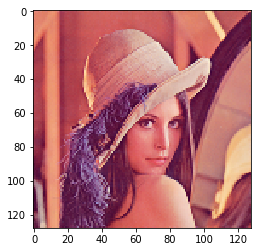

In [57]:
lenna_F_idct_png = Image.open("lenna_F_idct.png")
plt.imshow(lenna_F_idct_png)